### Importando as bases de dados

In [38]:
import pandas as pd

In [39]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,testado_positivo
1,1,85,66,29,0,26.6,0.351,31,testado_negativo
2,8,183,64,0,0,23.3,0.672,32,testado_positivo
3,1,89,66,23,94,28.1,0.167,21,testado_negativo
4,0,137,40,35,168,43.1,2.288,33,testado_positivo


In [40]:
batimentos = pd.read_csv('batimentos cardiacos.csv')
batimentos.head()

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44.247295,53.591343,3.397836,82.307425
1,81.427930,172.569375,33.142344,179.045377
2,50.807130,74.582817,8.645704,103.522796
3,55.778712,90.491878,12.622969,114.239779
4,53.790400,84.129280,11.032320,107.184063


In [41]:
colesterol = pd.read_csv('colesterol.csv')
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


### Modelo de classificação utilizando a base de dados de diabetes

In [42]:
x = diabetes.drop('resultado', axis = 1)
x.head()

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [43]:
y = diabetes['resultado']
y.head()

0    testado_positivo
1    testado_negativo
2    testado_positivo
3    testado_negativo
4    testado_positivo
Name: resultado, dtype: object

In [44]:
from sklearn.model_selection import train_test_split

SEED = 4121988

# default => 25% treino 75% teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

In [45]:
from sklearn.tree import DecisionTreeClassifier

clf_arvore = DecisionTreeClassifier(random_state=SEED, max_depth=3)

In [46]:
clf_arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=4121988)

In [47]:
clf_arvore.score(x_teste, y_teste)

0.8020833333333334

In [48]:
from sklearn.dummy import DummyClassifier

In [49]:
clf_dummy = DummyClassifier(strategy='most_frequent')

In [50]:
clf_dummy.fit(x_treino, y_treino)

DummyClassifier(strategy='most_frequent')

In [51]:
clf_dummy.score(x_teste, y_teste)

0.6927083333333334

In [52]:
from sklearn.neighbors import NearestCentroid

clf_neighbor = NearestCentroid()

In [53]:
clf_neighbor.fit(x_treino, y_treino)

NearestCentroid()

In [54]:
clf_neighbor.score(x_teste, y_teste)

0.6354166666666666

c:\Users\UserX\anaconda3\lib\site-packages\sklearn\tree\_export.py:184: FutureWarning: 'rotate' has no effect and is deprecated in 0.23. It will be removed in 1.0 (renaming of 0.25).
  warnings.warn(("'rotate' has no effect and is deprecated in 0.23. "


<function matplotlib.pyplot.show(close=None, block=None)>

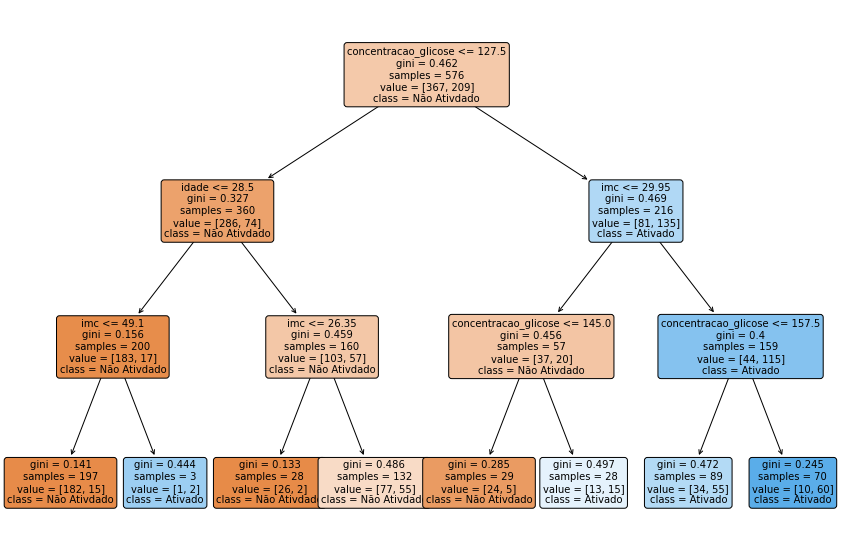

In [55]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
tree.plot_tree(clf_arvore,
               ax = ax,
               fontsize = 10,
               rounded = True,
               filled = True,
               feature_names = x_treino.columns,
               class_names = ['Não Ativdado', 'Ativado'], rotate = True)
plt.show

### Modelo de regressão utilizando a base de dados de batimentos cardíacos

<Figure size 7200x3600 with 0 Axes>

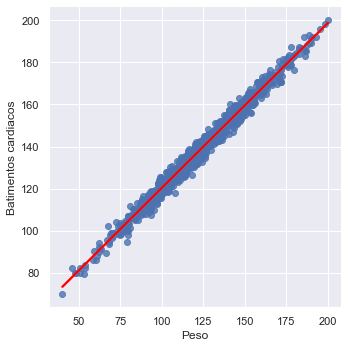

In [58]:
import seaborn as sns

sns.set()
plt.figure(figsize=(100,50))

sns.lmplot(x = 'Peso', y = 'Batimentos cardiacos', data = batimentos, line_kws = {'color':'red'})
plt.show()

In [59]:
x = batimentos[['Peso', 'Idade']]

In [60]:
y = batimentos['Batimentos cardiacos']

In [61]:
SEED = 4500

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=SEED)

In [63]:
from sklearn import linear_model

rgs = linear_model.LinearRegression(fit_intercept=False, normalize=True)

In [64]:
rgs.fit(x_treino, y_treino)

LinearRegression(fit_intercept=False, normalize=True)

In [65]:
rgs.score(x_teste, y_teste)

0.9872272899997122

### Modelo de clustering utilizando a base de dados de colesterol

<AxesSubplot:xlabel='pressao_sanguinea_repouso', ylabel='colesterol'>

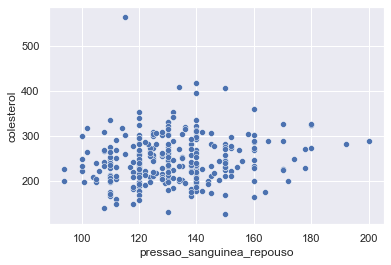

In [66]:
sns.scatterplot(x = 'pressao_sanguinea_repouso', y = 'colesterol', data = colesterol)

In [68]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, random_state = 9)

In [73]:
colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         303 non-null    int64  
 1   genero                        303 non-null    int64  
 2   tipo_dor_peito                303 non-null    int64  
 3   pressao_sanguinea_repouso     303 non-null    int64  
 4   acucar_jejum                  303 non-null    int64  
 5   resultado_eletrocardio        303 non-null    int64  
 6   freq_cardio_max               303 non-null    int64  
 7   angina_exercicio              303 non-null    int64  
 8   depressao_induzida_exercicio  303 non-null    float64
 9   inclinacao                    303 non-null    int64  
 10  num_princ_vasos               303 non-null    object 
 11  thal                          303 non-null    object 
 12  diag_doenca_cardiaca          303 non-null    int64  
 13  coles

In [74]:
x = colesterol.select_dtypes('int64')

In [75]:
kmeans.fit(x)

KMeans(n_clusters=2, random_state=9)

In [76]:
kmeans.labels_

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

<AxesSubplot:xlabel='pressao_sanguinea_repouso', ylabel='colesterol'>

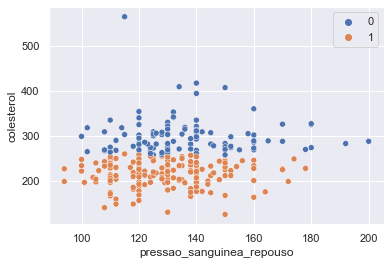

In [77]:
sns.scatterplot(x = 'pressao_sanguinea_repouso', y = 'colesterol', data = colesterol, hue = kmeans.labels_)

In [78]:
colesterol['clusters'] = kmeans.labels_
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol,clusters
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233,1
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286,0
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229,1
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250,1
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204,1


In [79]:
colesterol.groupby('clusters')['colesterol'].mean()

clusters
0    298.963964
1    216.473958
Name: colesterol, dtype: float64